# 57. Introduction to data science. Data manipulations with Python modules

# 57. Introducción a la ciencia de datos. Manipulaciones de datos con módulos de Python

- [NumPy documentation](https://numpy.org/doc/stable/)
- [pandas documentation](https://pandas.pydata.org/docs/)
- [polars API reference](https://pola-rs.github.io/polars/py-polars/html/reference/index.html)
- [datatable User Guide](https://datatable.readthedocs.io/en/latest/manual/index-manual.html#user-guide)
- [modin Usage Guide](https://modin.readthedocs.io/en/stable/usage_guide/index.html)
- [Vaex docs](https://vaex.io/docs/index.html)
- [CuPy](https://docs.cupy.dev/en/stable/)

In [ ]:
import numpy as np, pandas as pd, pylab as pl
import torch, itertools, requests, scipy, random, sqlite3

## Basic NumPy Objects: constants, scalars, arrays, data types, ...

## Objetos NumPy básicos: constantes, escalares, matrices, tipos de datos, ...

In [ ]:
# infinity in positive direction / infinito en dirección positiva
# it will give a warning, but not an error
# dará una advertencia, pero no un error
display([np.inf, -np.inf, np.array([1])/0.])
# value is not defined (analogous to None)
# valor no está definido (análogo a None)
# it will give a warning, but not an error
# dará una advertencia, pero no un error
display([np.nan, np.log(-1)])
display([np.pi, np.e, np.NZERO, np.PZERO])

<ipython-input-2-848baec3f644>:4: RuntimeWarning: divide by zero encountered in divide
  display([np.inf, -np.inf, np.array([1])/0.])


[inf, -inf, array([inf])]

<ipython-input-2-848baec3f644>:9: RuntimeWarning: invalid value encountered in log
  display([np.nan, np.log(-1)])


[nan, nan]

[3.141592653589793, 2.718281828459045, -0.0, 0.0]

[Скаляры](https://numpy.org/devdocs/reference/arrays.scalars.html)

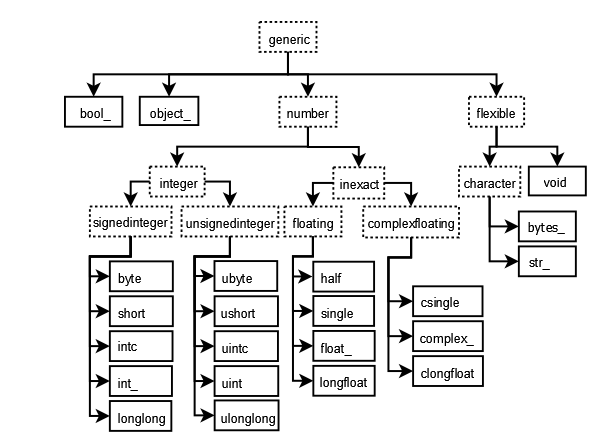

In [ ]:
f16_1,f16_2 = np.float16(".1"),np.float16(".1")
f32_1,f32_2 = np.float32(f16_1),np.float32(".1")
f64_1,f64_2 = np.float64(f32_1),np.float64(".1")
display([f16_1 == f32_1 == f64_1,f16_2 == f32_2 == f64_2])

[True, False]

In [ ]:
# Unix epoch (00:00:00 UTC, 1 January 1970)
lst = [('2005-02-25',), ('2005-02','D'), (1,'Y'), ('nat',)]
for el in lst:
    display([np.datetime64(*el)])

[numpy.datetime64('2005-02-25')]

[numpy.datetime64('2005-02-01')]

[numpy.datetime64('1971')]

[numpy.datetime64('NaT')]

In [ ]:
url = 'https://numpy.org/devdocs/reference/arrays.datetime.html#arrays-datetime'
page = requests.get(url).text
time_types1 = pd.read_html(page)[0]
props = [('min-height','30px'),('min-wigth','15px'),
         ('text-align','center'),('color','darkblue')]
cells = {'selector':'td','props':props}
time_types1.style.set_table_styles([cells])

,Code,Meaning,Time span (relative),Time span (absolute)
0,Y,year,+/- 9.2e18 years,"[9.2e18 BC, 9.2e18 AD]"
1,M,month,+/- 7.6e17 years,"[7.6e17 BC, 7.6e17 AD]"
2,W,week,+/- 1.7e17 years,"[1.7e17 BC, 1.7e17 AD]"
3,D,day,+/- 2.5e16 years,"[2.5e16 BC, 2.5e16 AD]"


In [ ]:
time_types2 = pd.read_html(page)[1]
time_types2.style.set_table_styles([cells])

,Code,Meaning,Time span (relative),Time span (absolute)
0,h,hour,+/- 1.0e15 years,"[1.0e15 BC, 1.0e15 AD]"
1,m,minute,+/- 1.7e13 years,"[1.7e13 BC, 1.7e13 AD]"
2,s,second,+/- 2.9e11 years,"[2.9e11 BC, 2.9e11 AD]"
3,ms,millisecond,+/- 2.9e8 years,"[ 2.9e8 BC, 2.9e8 AD]"
4,us / μs,microsecond,+/- 2.9e5 years,"[290301 BC, 294241 AD]"
5,ns,nanosecond,+/- 292 years,"[ 1678 AD, 2262 AD]"
6,ps,picosecond,+/- 106 days,"[ 1969 AD, 1970 AD]"
7,fs,femtosecond,+/- 2.6 hours,"[ 1969 AD, 1970 AD]"
8,as,attosecond,+/- 9.2 seconds,"[ 1969 AD, 1970 AD]"


In [ ]:
# time difference in seconds
# diferencia horaria en segundos
td1 = (np.datetime64("2021-01-01 12:56:23.423")-\
       np.datetime64("2021-01-01")) / np.timedelta64(1,"s")
td2 = np.datetime64("2000-01-01","us") - np.datetime64("0000-01-01","us")
display([td1], [td2])

[46583.423]

[numpy.timedelta64(63113904000000000,'us')]

In [ ]:
# Python string like
x = np.char.capitalize("world")
x.__array_interface__

{'data': (94403075332240, False),
 'strides': None,
 'descr': [('', '<U5')],
 'typestr': '<U5',
 'shape': (),
 'version': 3}

`ndarray = memory block + indexing scheme + data type description`

- initial data
- how the elements are arranged
- how to interpret an element

`ndarray = bloque de memoria + esquema de indexación + descripción del tipo de datos`

- datos iniciales
- cómo se organizan los elementos
- cómo interpretar un elemento

In [ ]:
# arrays can share memory
# matrices pueden compartir memoria
x = np.array(range(10))
y, z = x[1:], x[5:]
x[7] = 100
display(x, y, z, x.flags)

array([  0,   1,   2,   3,   4,   5,   6, 100,   8,   9])

array([  1,   2,   3,   4,   5,   6, 100,   8,   9])

array([  5,   6, 100,   8,   9])

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [ ]:
# the original object is not necessarily an array
# el objeto original no es necesariamente una matriz
x = b'123456789'
y = np.frombuffer(x, dtype=np.int8)
display([y], y.base)
y.flags

[array([49, 50, 51, 52, 53, 54, 55, 56, 57], dtype=int8)]

b'123456789'

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False

Creating arrays
- from Python sequential types
- using functions defined in the module
- modifying existing ones
- downloading information from external sources
- from objects of other modules
...

Creando matrices
- de tipos secuenciales de Python
- utilizando funciones definidas en el módulo
- modificar los existentes
- descargar información de fuentes externas
- de objetos de otros módulos
...

In [ ]:
x = np.array([1, 2, 5., 8])
display(*x.__array_interface__.items())

('data', (94403074668112, False))

('strides', None)

('descr', [('', '<f8')])

('typestr', '<f8')

('shape', (4,))

('version', 3)

In [ ]:
# 8-bit signed integer => [-2**7; 2**7-1]
lst1 = [2**7+i-1 for i in range(5)]
arr1 = np.array(lst1, dtype=np.int8)
lst2 = [2**31+i-1 for i in range(5)]
arr2 = np.array(lst2, dtype=np.int32)
display([arr1], [arr2])

[array([ 127, -128, -127, -126, -125], dtype=int8)]

[array([ 2147483647, -2147483648, -2147483647, -2147483646, -2147483645],
       dtype=int32)]

In [ ]:
# 16-bit unsigned integer => [0; 2**16-1]
arr1 = np.array([2, 3, 4], dtype=np.uint16)
arr2 = np.array([4, 4, 4], dtype=np.uint16)
# the same data type / el mismo tipo de datos
arr3 = arr1 - arr2
# different data types => data type that includes all elements
# diferentes tipos de datos => tipo de datos que incluye todos los elementos
arr4 = arr1 - arr2.astype(np.int16)
display([arr3], [arr4])

[array([65534, 65535,     0], dtype=uint16)]

[array([-2, -1,  0], dtype=int32)]

In [ ]:
# numpy built-ins
arr1D_1 = np.arange(2, 20, 2, dtype=float)
# 10 equal intervals on the segment [0; 1] - 11 points
# 10 intervalos iguales en el segmento [0; 1] - 11 puntos
arr1D_2 = np.linspace(0, 1, 11)
display(arr1D_1, arr1D_2)

array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18.])

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
# diagonal matrices, square by default
# matrices diagonales, cuadradas por defecto
arr2D_1 = np.eye(3, 6)
arr2D_2 = np.diag([1, 2, 3], 2)
# numbers in sequence to powers up to 0, 1, 2, 3, 4 (up to 5-1)
# números en secuencia a potencias hasta 0, 1, 2, 3 (hasta 4-1)
arr2D_3 = np.vander((1, 3, 5), 5)
display(arr2D_1, arr2D_2, arr2D_3)
display(np.zeros((2, 3)), np.ones((3, 2)))

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 3],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

array([[  1,   1,   1,   1,   1],
       [ 81,  27,   9,   3,   1],
       [625, 125,  25,   5,   1]])

array([[0., 0., 0.],
       [0., 0., 0.]])

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [ ]:
# np.random.choice(5, 10) <=> np.random.randint(0, 5, 10)
display(np.random.choice(5, 10, p=[.1, 0, .3, .6, 0]))

array([3, 2, 3, 3, 3, 3, 0, 3, 2, 2])

In [ ]:
# it affects the original object / afecta al objeto original
arr11 = np.array([1, 2, 3, 4, 5])
arr21 = arr11[:2]
arr21 += 1
# it has no effect on the original object
# no tiene ningún efecto sobre el objeto original
arr12 = np.array([1, 2, 3, 4, 5])
arr22 = arr12.copy()[:2]
arr22 += 1
display([arr11, arr21],[arr12, arr22])

[array([2, 3, 3, 4, 5]), array([2, 3])]

[array([1, 2, 3, 4, 5]), array([2, 3])]

In [ ]:
# numpy.vstack, numpy.hstack, numpy.block...
arr = np.block([[np.ones((2, 2)), np.eye(2, 2)],
                [np.zeros((2, 2)), np.diag((10, 100))]])
display(arr)

array([[  1.,   1.,   1.,   0.],
       [  1.,   1.,   0.,   1.],
       [  0.,   0.,  10.,   0.],
       [  0.,   0.,   0., 100.]])

In [ ]:
%%writefile example.csv
x, y, z
0, 0, 0
1, 1, 1
2, 4, 8

Writing example.csv


In [ ]:
arr = np.loadtxt('example.csv', delimiter=',', skiprows=1)
display(arr)

array([[0., 0., 0.],
       [1., 1., 1.],
       [2., 4., 8.]])

In [ ]:
from io import StringIO
data = u"""#
# a comment / un comentario
1, 2\n3, 4
5,   6 # add extra spaces / agregar espacios adicionales
7, 8\n9, 0
"""
arr = np.genfromtxt(StringIO(data), comments="#", delimiter=",")
display(arr, arr.dtype)

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.],
       [9., 0.]])

dtype('float64')

In [ ]:
# from pandas dataframes / de marcos de datos de pandas
df = pd.DataFrame(
     {"A":[1, 2], "B":[3., 4.],
      "D":pd.date_range('2000', periods=2)})
# arrays taking into account all data types
# matrices teniendo en cuenta todos los tipos de datos
display(df, [df.to_numpy()], [df.__array__()])

,A,B,D
0,1,3.0,2000-01-01
1,2,4.0,2000-01-02


[array([[1, 3.0, Timestamp('2000-01-01 00:00:00')],
        [2, 4.0, Timestamp('2000-01-02 00:00:00')]], dtype=object)]

[array([[1, 3.0, Timestamp('2000-01-01 00:00:00')],
        [2, 4.0, Timestamp('2000-01-02 00:00:00')]], dtype=object)]

In [ ]:
# it does not change the type (class) of the original object
# no cambia el tipo (clase) del objeto original
ps = np.add(pd.Series(range(5)), range(5))
print(type(ps))
display(ps)
tt = np.sqrt(torch.tensor([[1, 2], [3, 4]]))
print(type(tt))
display(tt)

<class 'pandas.core.series.Series'>


0    0
1    2
2    4
3    6
4    8
dtype: int64

<class 'torch.Tensor'>


tensor([[1.0000, 1.4142],
        [1.7321, 2.0000]], dtype=torch.float64)

In [ ]:
# from the list created by the iterator
# de la lista creada por el iterador
s = ["🍊", "🍋", "🍎"]
s = np.array(list(itertools.permutations(s, 2)))
display(s)

array([['🍊', '🍋'],
       ['🍊', '🍎'],
       ['🍋', '🍊'],
       ['🍋', '🍎'],
       ['🍎', '🍊'],
       ['🍎', '🍋']], dtype='<U1')

Element manipulations || Manipulaciones de elementos

In [ ]:
x = np.arange(10).reshape(2, 5)
display(x, x[0, 2] == x[0][2])
x = np.arange(16).reshape(4, 4)
display(x)
display(x[slice(2, 3)], x[range(2, 3)], x[[2, 2]], x[(2, 2)])

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

True

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([[ 8,  9, 10, 11]])

array([[ 8,  9, 10, 11]])

array([[ 8,  9, 10, 11],
       [ 8,  9, 10, 11]])

10

In [ ]:
x = np.arange(30).reshape(3, 10)
display(x, x[2:], x[:, ::-3])
x = np.arange(35).reshape(5, 7)
idx1, idx2 = [0, 2, 4], [1, 3, 5]
display(x, x[idx1, idx2])

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

array([[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

array([[ 9,  6,  3,  0],
       [19, 16, 13, 10],
       [29, 26, 23, 20]])

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

array([ 1, 17, 33])

In [ ]:
x = np.arange(35).reshape(5, 7)
rows1 = np.array([[0, 0], [3, 3]], dtype=np.intp)
cols1 = np.array([[1, 4], [1, 4]], dtype=np.intp)
# it does not need to repeat
# no es necesario repetir
rows2 = np.array([0, 3], dtype=np.intp)
cols2 = np.array([1, 4], dtype=np.intp)
display(x, x[rows1, cols1],
        x[rows2[:, np.newaxis], cols2],
        x[np.ix_(rows2, cols2)])

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

array([[ 1,  4],
       [22, 25]])

array([[ 1,  4],
       [22, 25]])

array([[ 1,  4],
       [22, 25]])

In [ ]:
x = np.arange(24).reshape(2, 3, 4)
display(x, x[..., 0], x[:, :, 0])
x = np.array(12 * [0, 1, 2]).reshape(3, 2, 2, 3)
for a in (x, x[0], x[0, ..., 2]):
    display(np.array2string(a).replace('\n',''))
x.shape, x[0, ..., 2].shape

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

array([[ 0,  4,  8],
       [12, 16, 20]])

array([[ 0,  4,  8],
       [12, 16, 20]])

'[[[[0 1 2]   [0 1 2]]  [[0 1 2]   [0 1 2]]] [[[0 1 2]   [0 1 2]]  [[0 1 2]   [0 1 2]]] [[[0 1 2]   [0 1 2]]  [[0 1 2]   [0 1 2]]]]'

'[[[0 1 2]  [0 1 2]] [[0 1 2]  [0 1 2]]]'

'[[2 2] [2 2]]'

((3, 2, 2, 3), (2, 2))

In [ ]:
x = np.arange(12).reshape(2, 3, 2)
for a in (x, x[..., np.newaxis], x[:, :, :, None]):
    display(np.array2string(a).replace('\n',''))

'[[[ 0  1]  [ 2  3]  [ 4  5]] [[ 6  7]  [ 8  9]  [10 11]]]'

'[[[[ 0]   [ 1]]  [[ 2]   [ 3]]  [[ 4]   [ 5]]] [[[ 6]   [ 7]]  [[ 8]   [ 9]]  [[10]   [11]]]]'

'[[[[ 0]   [ 1]]  [[ 2]   [ 3]]  [[ 4]   [ 5]]] [[[ 6]   [ 7]]  [[ 8]   [ 9]]  [[10]   [11]]]]'

In [ ]:
# assigning new values / asignar nuevos valores
x = np.arange(16).reshape(4 * (2, ))
for a in (x, x[1, Ellipsis, 1]):
    display(np.array2string(a).replace('\n',''))
# x[1, Ellipsis, 1] == x[1, ..., 1]
# data type is the same for the entire array
# executed if it is possible to retrieve values of the same type
# el tipo de datos es el mismo para toda la matriz
# ejecutado si es posible recuperar valores del mismo tipo
x[1, Ellipsis, 1] = 100.2
display(np.array2string(x).replace('\n',''))

'[[[[ 0  1]   [ 2  3]]  [[ 4  5]   [ 6  7]]] [[[ 8  9]   [10 11]]  [[12 13]   [14 15]]]]'

'[[ 9 11] [13 15]]'

'[[[[  0   1]   [  2   3]]  [[  4   5]   [  6   7]]] [[[  8 100]   [ 10 100]]  [[ 12 100]   [ 14 100]]]]'

In [ ]:
# advanced indexing: boolean, named, iterative
# indexación avanzada: booleana, con nombre, iterativa
x = np.array([[1, 2], [np.nan, 3], [np.nan, np.nan], [4, np.nan]])
print(x.shape); display(x, x[~np.isnan(x)])
x = np.arange(15).reshape(5, 3)
cond = x > 10
display(cond, cond[3:, :].astype('int'), x[cond])

(4, 2)


array([[ 1.,  2.],
       [nan,  3.],
       [nan, nan],
       [ 4., nan]])

array([1., 2., 3., 4.])

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

array([[0, 0, 1],
       [1, 1, 1]])

array([11, 12, 13, 14])

In [ ]:
x = np.arange(15).reshape(5,3)
display(x)
# apply the .sum() method in different dimensions
# aplicar el método .sum() en diferentes dimensiones
display(x.sum(),  x.sum(axis=0), x.sum(axis=1), x.sum(-1))
# select rows by the sum of elements in the row
# seleccionar filas por la suma de elementos en la fila
cond = x.sum(-1) <= 20
display(x[cond])

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

105

array([30, 35, 40])

array([ 3, 12, 21, 30, 39])

array([ 3, 12, 21, 30, 39])

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
# combination of different data types is possible
# es posible combinar diferentes tipos de datos
x = np.ones((1, 3), dtype=[('a', np.int32), ('b', np.float64, (2, 1))])
display(x)
# named fields
display(x['a'], x['a'].shape,
        np.array2string(x['b']).replace('\n',''), x['b'].shape)

array([[(1, [[1.], [1.]]), (1, [[1.], [1.]]), (1, [[1.], [1.]])]],
      dtype=[('a', '<i4'), ('b', '<f8', (2, 1))])

array([[1, 1, 1]], dtype=int32)

(1, 3)

'[[[[1.]   [1.]]  [[1.]   [1.]]  [[1.]   [1.]]]]'

(1, 3, 2, 1)

In [ ]:
x = np.arange(1, 7).reshape(2, 3)
display(x)
# 1D iterator (and many others)
# Iterador 1D (y muchos otros)
print(type(x.flat))
x.flat = 0; display(x)
x.flat[1:4] = 1; display(x)

array([[1, 2, 3],
       [4, 5, 6]])

<class 'numpy.flatiter'>


array([[0, 0, 0],
       [0, 0, 0]])

array([[0, 1, 1],
       [1, 0, 0]])

In [ ]:
# numpy data types / numpy tipos de datos
url='https://numpy.org/devdocs/user/basics.types.html'
page = requests.get(url).text
data_types = pd.read_html(page)[0]
props = [('min-height', '30px'), ('min-wigth', '15px'),
         ('text-align', 'center'), ('color', 'darkblue')]
cells = {'selector':'td', 'props':props}
data_types.style.set_table_styles([cells])

,Canonical Python API name,Python API “C-like” name,Actual C type,Description
0,numpy.bool_,nan,bool (defined in stdbool.h),Boolean (True or False) stored as a byte.
1,numpy.int8,numpy.byte,signed char,Platform-defined integer type with 8 bits.
2,numpy.uint8,numpy.ubyte,unsigned char,Platform-defined integer type with 8 bits without sign.
3,numpy.int16,numpy.short,short,Platform-defined integer type with 16 bits.
4,numpy.uint16,numpy.ushort,unsigned short,Platform-defined integer type with 16 bits without sign.
5,numpy.int32,numpy.intc,int,Platform-defined integer type with 32 bits.
6,numpy.uint32,numpy.uintc,unsigned int,Platform-defined integer type with 32 bits without sign.
7,numpy.intp,nan,intptr_t (defined in stdint.h),Platform-defined integer type capable of holding a pointer.
8,numpy.uintp,nan,uintptr_t (defined in stdint.h),Platform-defined integer type capable of holding a pointer without sign.
9,numpy.int32 or numpy.int64,numpy.long,long,Platform-defined integer type with at least 32 bits.


In [ ]:
# a huge number of ways to manage types
# una gran cantidad de formas de gestionar tipos
x = np.float32(range(5))
y = np.arange(3,dtype=np.uint8)
display([x], [y], [y.astype(float)], [np.uint8(x)])

[array([0., 1., 2., 3., 4.], dtype=float32)]

[array([0, 1, 2], dtype=uint8)]

[array([0., 1., 2.])]

[array([0, 1, 2, 3, 4], dtype=uint8)]

In [ ]:
# value limits / límites de valor
display([np.iinfo(np.int64)])
# np.longdouble - higher calculation accuracy than python float
# np.longdouble: mayor precisión de cálculo que python float
display([np.finfo(np.longdouble)])
# data type conversion table
# tabla de conversión de tipos de datos
mark = {False:'\033[1;31m -\033[0;0m',
         True:'\033[1;34m +\033[0;0m'}
nptypes = np.typecodes['All']
print('* ' + ' '.join(nptypes))
for row in nptypes:
    print(row,end='')
    for col in nptypes:
        print(mark[np.can_cast(row,col)],end='')
    print()

[iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)]

[finfo(resolution=1e-18, min=-1.189731495357231765e+4932, max=1.189731495357231765e+4932, dtype=float128)]

* ? b h i l q p B H I L Q P e f d g F D G S U V O M m
? + + + + + + + + + + + + + + + + + + + + + + + + - +
b - + + + + + + - - - - - - + + + + + + + + + + + - +
h - - + + + + + - - - - - - - + + + + + + + + + + - +
i - - - + + + + - - - - - - - - + + - + + + + + + - +
l - - - - + + + - - - - - - - - + + - + + + + + + - +
q - - - - + + + - - - - - - - - + + - + + + + + + - +
p - - - - + + + - - - - - - - - + + - + + + + + + - +
B - - + + + + + + + + + + + + + + + + + + + + + + - +
H - - - + + + + - + + + + + - + + + + + + + + + + - +
I - - - - + + + - - + + + + - - + + - + + + + + + - +
L - - - - - - - - - - + + + - - + + - + + + + + + - -
Q - - - - - - - - - - + + + - - + + - + + + + + + - -
P - - - - - - - - - - + + + - - + + - + + + + + + - -
e - - - - - - - - - - - - - + + + + + + + + + + + - -
f - - - - - - - - - - - - - - + + + + + + + + + + - -
d - - - - - - - - - - - - - - - + + - + + + + + + - -
g - - - - - - - - - - - - - - - - + - - + + + + + - -
F - - - - - - - - - - - - - 

Data typing objects (descriptor)
- scalar type (integer, float, Python object, etc.)
- data size (how many bytes, for example, in an integer)
- data byte order
  - big-endian >
  - little-endian <
  - hardware-native, default =

if the data type is structured
- names of the “fields” of the structure
- data type of each field
- what part of the memory block does each field occupy?

if the data type is a subclass
- its form and data type

A big-endian system stores
- most significant byte at smallest memory address,
- and the least significant byte is the largest byte.

A little-endian system, on the other hand, stores
low byte at lowest address.

Objetos de tipificación de datos (descriptor)
- tipo escalar (entero, flotante, objeto Python, etc.)
- tamaño de los datos (cuántos bytes, por ejemplo, hay en un número entero)
- orden de bytes de datos
   - big endian >
   - little-endian <
   - nativo del hardware, predeterminado =

si el tipo de datos está estructurado
- nombres de los “campos” de la estructura
- tipo de datos de cada campo
- ¿Qué parte del bloque de memoria ocupa cada campo?

si el tipo de datos es una subclase
- su forma y tipo de datos

Un sistema big-endian almacena
- byte más significativo en la dirección de memoria más pequeña,
- y el byte menos significativo es el byte más grande.

Por otra parte, un sistema little-endian almacena
byte bajo en la dirección más baja.

In [ ]:
dt = np.dtype(np.int32)
(dt.type, dt.itemsize, dt.byteorder, dt.char,
 (np.issubdtype(np.short, dt),
  np.issubdtype(np.intc, dt),
  np.issubdtype(np.int_, dt)))

(numpy.int32, 4, '=', 'i', (False, True, False))

In [ ]:
# Python-compatible, Python-compatible, Python-compatible, Python
np.dtype(int), np.dtype(float), np.dtype(complex), np.dtype(object)

(dtype('int64'), dtype('float64'), dtype('complex128'), dtype('O'))

In [ ]:
dt01 = np.dtype('i4')   # 32-bit signed integer
dt02 = np.dtype('f8')   # 64-bit floating-point number
dt03 = np.dtype('c16')  # 128-bit complex floating-point number
dt04 = np.dtype('a25')  # 25-length zero-terminated bytes
dt05 = np.dtype('U25')  # 25-character string
dt01, dt02, dt03, dt04, dt05

(dtype('int32'),
 dtype('float64'),
 dtype('complex128'),
 dtype('S25'),
 dtype('<U25'))

In [ ]:
# an object with different data types
# un objeto con diferentes tipos de datos
dt = np.dtype("i4, (2,3)f8, (1,2)S10")
display(dt)
# fill one element of the array with the specified structure with zeros
# rellenar un elemento de la matriz con la estructura especificada con ceros
display(np.zeros(1, dtype=dt))
# or a boolean value / o un valor booleano
np.array([True], dtype=dt)

dtype([('f0', '<i4'), ('f1', '<f8', (2, 3)), ('f2', 'S10', (1, 2))])

array([(0, [[0., 0., 0.], [0., 0., 0.]], [[b'', b'']])],
      dtype=[('f0', '<i4'), ('f1', '<f8', (2, 3)), ('f2', 'S10', (1, 2))])

array([(1, [[1., 1., 1.], [1., 1., 1.]], [[b'True', b'True']])],
      dtype=[('f0', '<i4'), ('f1', '<f8', (2, 3)), ('f2', 'S10', (1, 2))])

Basic principles of overriding
- you will get a more massive (“senior”) type
   - in mixed manipulations
   - the result of the method goes beyond the boundaries of this type
- does not change type
   - assigning values to elements
   - rounding
   - ...
- fixation of a certain type
   - indication when declaring a variable
   - special methods of change
   - ...

Principios básicos de anulación
- obtendrás un tipo más masivo (“senior”)
    - en manipulaciones mixtas
    - el resultado del método va más allá de los límites de este tipo
- no cambia de tipo
    - asignar valores a los elementos
    - redondeo
    -...
- fijación de un cierto tipo
    - indicación al declarar una variable
    - métodos especiales de cambio
    -...

In [ ]:
a_int = np.array(range(5), dtype=np.dtype('int16'))
a_float = np.array(range(5), dtype=np.dtype('float32'))
display(a_int, a_float)
display([(a_int / 2).dtype, (a_int + .2).dtype,
         (a_float + 1j).dtype, np.sqrt(a_int).dtype])
display([(a_int // 2).dtype, np.round(a_float).dtype,
         (a_float + 2).dtype, np.sqrt(a_float).dtype])

array([0, 1, 2, 3, 4], dtype=int16)

array([0., 1., 2., 3., 4.], dtype=float32)

[dtype('float64'), dtype('float64'), dtype('complex64'), dtype('float32')]

[dtype('int16'), dtype('float32'), dtype('float32'), dtype('float32')]

In [ ]:
a_int[0] = 10.5; display(a_int)
display(a_float.astype('int16').dtype)

array([10,  1,  2,  3,  4], dtype=int16)

dtype('int16')

In [ ]:
af64 = np.zeros((int(1e7),), dtype=np.float64)
af32 = np.zeros((int(1e7),), dtype=np.float32)
af16 = np.zeros((int(1e7),), dtype=np.float16)
%timeit af64 * af64
%timeit af32 * af32
%timeit af16 * af16

56.9 ms ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
33.7 ms ± 8.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
317 ms ± 39.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# incorrect answers due to exceeding the type's capabilities
# respuestas incorrectas debido a que se exceden las capacidades del tipo
# right and not right
np.power(100, 8, dtype=np.int64), np.power(100, 8, dtype=np.int32)

(10000000000000000, 1874919424)

Broadcastable Arrays
- data types
- dimensions
- rules of mathematical operations

Matrices transmisibles
- tipos de datos
- dimensiones
- reglas de operaciones matemáticas

operations on arrays of different shapes without explicitly reshaping them

operaciones en matrices de diferentes formas sin remodelarlas explícitamente

In [ ]:
3 * np.array([1, 2]), np.array(3 * [1, 2])

(array([3, 6]), array([1, 2, 1, 2, 1, 2]))

In [ ]:
from numpy.linalg import multi_dot
A = np.random.random((10, 100))
B = np.random.randint(1, 100, (100, 1000))
C = np.random.random((1000, 5))
D = np.random.random((5, 3))
M1 = np.dot(np.dot(np.dot(A, B), C), D)
M2 = A.dot(B).dot(C).dot(D)
M3 = multi_dot([A, B, C, D])
M1.all() == M2.all() == M3.all(), M1.shape

(True, (10, 3))

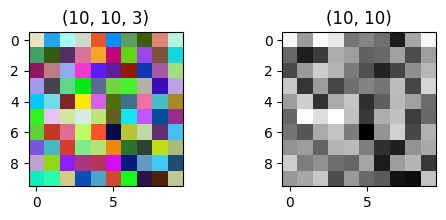

In [ ]:
# dimension compatibility, example 1 / compatibilidad de dimensiones, ejemplo 1
# an image (3 colors) / una imagen (3 colores) 256 x 256 x 3
# black and white scaling (a vector with  3 numbers)
# escalado en blanco y negro (un vector con 3 números)
# result (1 color) / resultado (1 color) 256 x 256
img = np.random.random((10, 10, 3))
# each pixel is a dot product
# cada píxel es un producto escalar
gray_img = np.dot(img, 3 * [.33])
f, (ax1, ax2) = pl.subplots(1, 2, figsize=(6,2))
ax1.imshow(img)
ax1.set_title(f'{img.shape}')
ax2.imshow(gray_img,cmap='gray')
ax2.set_title(f'{gray_img.shape}');

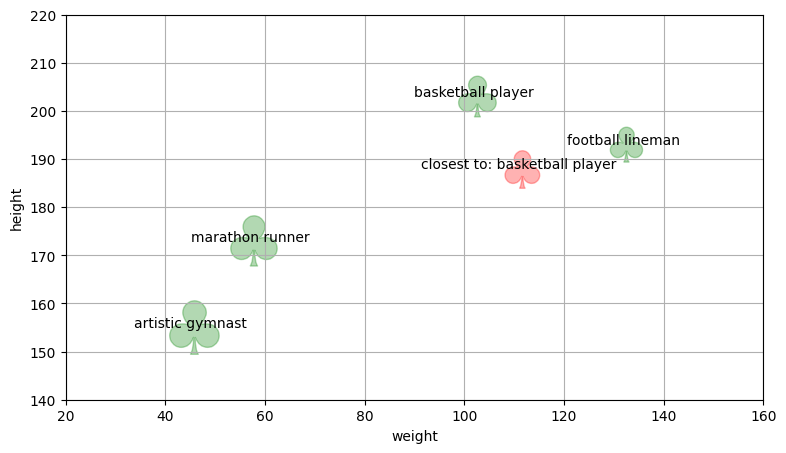

In [ ]:
# dimension compatibility, example 2 / compatibilidad de dimensiones, ejemplo 2
# To which of the 4 athletes is the point sample closest in terms of indicators?
# ¿A cuál de los 4 atletas se acerca más la muestra puntual en términos de indicadores?
values = np.array(
     [[102., 203.], [132., 193.], [45., 155.], [57., 173.]])
sample = np.array([111., 188.])
labels = ['basketball player','football lineman',
          'artistic gymnast','marathon runner']
fig, ax = pl.subplots(figsize=(9,5))
ax.scatter(values[:,0], values[:,1], 500*values[:,1]/values[:,0],
            c="green", alpha=.3, marker=r'$\clubsuit$')
[ax.annotate(labels[i], values[i], ha='center') for i in range(4)]
# comparison of 2 same characteristics (height and weight)
# comparación de 2 mismas características (altura y peso)
diff = values - sample # broadcastable !!!
dist = np.sqrt(np.sum(diff**2, axis=-1))
ax.scatter(sample[0], sample[1], 500*sample[1]/sample[0],
            c="red", alpha=.3, marker=r'$\clubsuit$')
ax.annotate('closest to: '+labels[np.argmin(dist)], sample, ha='center')
ax.set_xlabel('weight'); ax.set_ylabel('height')
ax.set_xlim(20, 160); ax.set_ylim(140, 220); ax.grid();

Copies and array views
- changes in the view are reflected in the source data
- changes to the copy do not affect the original

Copias y vistas de matriz
- los cambios en la vista se reflejan en los datos de origen
- los cambios en la copia no afectan el original


In [ ]:
# basic indexing => view
x = np.arange(10)
y = x[1:3]
display(y, x, y.base)
x[1:3] = [100, 101]
display(y, x, y.base)
print()
# advanced indexing => copy
x = np.arange(10)
y = x[[1, 2]]
display(y, x, y.base)
x[1:3] = [100, 101]
display(y, x, y.base)

array([1, 2])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([100, 101])

array([  0, 100, 101,   3,   4,   5,   6,   7,   8,   9])

array([  0, 100, 101,   3,   4,   5,   6,   7,   8,   9])

array([1, 2])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

None

array([1, 2])

array([  0, 100, 101,   3,   4,   5,   6,   7,   8,   9])

None

In [ ]:
x = np.random.random((2, 3))
y = x.T
display(y.base, y)
z = y.reshape(6)
x[:, 1:3] = [100, 101]
display(y.base, y, z.base, z)

array([[0.97132067, 0.13080001, 0.35296174],
       [0.20848188, 0.1582377 , 0.35374188]])

array([[0.97132067, 0.20848188],
       [0.13080001, 0.1582377 ],
       [0.35296174, 0.35374188]])

array([[  0.97132067, 100.        , 101.        ],
       [  0.20848188, 100.        , 101.        ]])

array([[  0.97132067,   0.20848188],
       [100.        , 100.        ],
       [101.        , 101.        ]])

array([[0.97132067, 0.20848188],
       [0.13080001, 0.1582377 ],
       [0.35296174, 0.35374188]])

array([0.97132067, 0.20848188, 0.13080001, 0.1582377 , 0.35296174,
       0.35374188])

Manipulations with the shape of objects || Manipulaciones con la forma de objetos

In [ ]:
# last dimension gets untangled first
# la última dimensión se desenreda primero
# transposing and unfolding turns "art" into an independent object
# transponer y desplegar convierte el "art" en un objeto independiente
a = np.array([[1, 2, 3], [4, 5, 6]])
ar, art = a.ravel(), a.T.ravel()
a[0, 2] = 10; ar[0] = 100; art[-1] = 1000
display([a, ar, ar.base])
display([a.T, art, art.base])

[array([[100,   2,  10],
        [  4,   5,   6]]),
 array([100,   2,  10,   4,   5,   6]),
 array([[100,   2,  10],
        [  4,   5,   6]])]

[array([[100,   4],
        [  2,   5],
        [ 10,   6]]),
 array([   1,    4,    2,    5,    3, 1000]),
 None]

In [ ]:
# transform the object shape
# transformar la forma del objeto
# transposing and reforming does not turn "art" into an independent object
# transponer y reformar no convierte el "art" en un objeto independiente
a = np.array([[1, 2, 3], [4, 5, 6]])
ar, art = a.reshape(6,1), a.T.reshape(6,1)
a[0, 2] = 10; ar[0] = 100; art[-1] = 100
display([a, ar, ar.base])
display([a.T, art, art.base])

[array([[100,   2,  10],
        [  4,   5,   6]]),
 array([[100],
        [  2],
        [ 10],
        [  4],
        [  5],
        [  6]]),
 array([[100,   2,  10],
        [  4,   5,   6]])]

[array([[100,   4],
        [  2,   5],
        [ 10,   6]]),
 array([[  1],
        [  4],
        [  2],
        [  5],
        [  3],
        [100]]),
 array([[  1,   4],
        [  2,   5],
        [  3, 100]])]

In [ ]:
# different transposition options / diferentes opciones de transposición
a = np.arange(4*3*2).reshape(4,3,2)
at1 = a.transpose()
at2 = a.transpose(1,2,0)
print(a.shape, at1.shape, at2.shape)
display(a[0,:,:], at1[:,:,0], at2[:,:,0])

(4, 3, 2) (2, 3, 4) (3, 2, 4)


array([[0, 1],
       [2, 3],
       [4, 5]])

array([[0, 2, 4],
       [1, 3, 5]])

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
# the number of elements can be changed
# el número de elementos se puede cambiar
a = np.arange(10); display(a)
a.resize((4,)); display(a)
a = np.arange(10); display(a)
a.resize((20,)); display(a)
b = a; b[-1] = 100; display(a)
# a.resize(10) will throw an error, the array is associated with another object
# a.resize(10) arrojará un error, la matriz está asociada con otro objeto

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 100])

In [ ]:
# the number of elements is affected by the data type
# el número de elementos se ve afectado por el tipo de datos
x = np.arange(8, dtype='uint8'); display(x)
# changing the data type of the object itself
# cambiando el tipo de datos del propio objeto
x.dtype = '<i2'; display(x, [0x0100, 0x0302, 0x0504, 0x0706])
# create a view with a different data type
# crear una vista con un tipo de datos diferente
xv = x.view('<i4'); display(xv, [0x03020100, 0x07060504])

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=uint8)

array([ 256,  770, 1284, 1798], dtype=int16)

[256, 770, 1284, 1798]

array([ 50462976, 117835012], dtype=int32)

[50462976, 117835012]

Indexing principles and schemes
- strides: how many bytes need to go to the next element

Principios y esquemas de indexación.
- strides: cuántos bytes se necesitan para ir al siguiente elemento

In [ ]:
x8 = np.array(range(1,31), dtype=np.int8).reshape(2,3,5)
# C & Fortran order
x16C = np.array(x8, dtype=np.int16)
x16F = np.array(x16C, order='F')
display([x8.shape, x16C.shape, x16F.shape,
         x8.strides, x16C.strides, x16F.strides])
print(x8.tobytes('A'), x16C.tobytes('A'), x16F.tobytes('A'), sep='\n')

[(2, 3, 5), (2, 3, 5), (2, 3, 5), (15, 5, 1), (30, 10, 2), (2, 4, 12)]

b'\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x0c\r\x0e\x0f\x10\x11\x12\x13\x14\x15\x16\x17\x18\x19\x1a\x1b\x1c\x1d\x1e'
b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00\x1c\x00\x1d\x00\x1e\x00'
b'\x01\x00\x10\x00\x06\x00\x15\x00\x0b\x00\x1a\x00\x02\x00\x11\x00\x07\x00\x16\x00\x0c\x00\x1b\x00\x03\x00\x12\x00\x08\x00\x17\x00\r\x00\x1c\x00\x04\x00\x13\x00\t\x00\x18\x00\x0e\x00\x1d\x00\x05\x00\x14\x00\n\x00\x19\x00\x0f\x00\x1e\x00'


In [ ]:
# (15,5,1), int8 - 1 bytes/number; [1,2,2]
byte_offset8 = (15*1 + 5*2 + 1*2)//1
display(x8.flat[byte_offset8], x8[1,2,2])
# (30,10,2), int16 - 2 bytes/number; [1,2,3]
byte_offset16C = (30*1 + 10*2 + 2*3)//2
display(x16C.flat[byte_offset16C], x16C[1,2,3])

28

28

29

29

In [ ]:
x = np.ones((int(1e5),))
xs = np.ones((int(1e5)*100,))[::100]
display([x.shape, xs.shape, x.strides, xs.strides])
%timeit x.sum()
%timeit xs.sum()

[(100000,), (100000,), (8,), (800,)]

121 µs ± 42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
916 µs ± 227 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
x8 = np.array(range(1,31),dtype=np.int8).reshape(2,3,5)
display((x8, x8.strides),
        (x8[::2,::3,::-1], x8[::2,::3,::-1].strides),
        (x8.T, x8.T.strides))

(array([[[ 1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10],
         [11, 12, 13, 14, 15]],
 
        [[16, 17, 18, 19, 20],
         [21, 22, 23, 24, 25],
         [26, 27, 28, 29, 30]]], dtype=int8),
 (15, 5, 1))

(array([[[5, 4, 3, 2, 1]]], dtype=int8), (30, 15, -1))

(array([[[ 1, 16],
         [ 6, 21],
         [11, 26]],
 
        [[ 2, 17],
         [ 7, 22],
         [12, 27]],
 
        [[ 3, 18],
         [ 8, 23],
         [13, 28]],
 
        [[ 4, 19],
         [ 9, 24],
         [14, 29]],
 
        [[ 5, 20],
         [10, 25],
         [15, 30]]], dtype=int8),
 (1, 5, 15))

Array subclasses || Subclases de matriz

In [ ]:
# structured arrays / matrices estructuradas
# cell values / valores de celdas
lst = [('Liza', 4.5, 23), ('Tom', 4.2, 27), ('Dan', 4.9, 25)]
# description of fields / descripción de campos
d = {'name':('U10', 0), 'grade':('float', 1), 'age':('i4', 2)}
x = np.array(lst, dtype=d)
display(x)
x[0] = ('Mary', 4.7, 26)
display(x)
x = np.append(x, np.array([('Liza', 4.5, 23)], dtype=x.dtype))
display(x)
display(x[:2], x[['name','age']])

array([('\U0017004c\U12000000@a', 4.5       , 23),
       ('\U001bcd54\U10cc0000@', 4.19921875, 27),
       ('\U00199a44\U13990000@', 4.89941406, 25)],
      dtype={'names': ['name', 'grade', 'age'], 'formats': ['<U10', '<f8', '<i4'], 'offsets': [0, 1, 2], 'itemsize': 40})

array([('\U001acd4d\U12cc0000@y', 4.69921875, 26),
       ('\U001bcd54\U10cc0000@', 4.19921875, 27),
       ('\U00199a44\U13990000@', 4.89941406, 25)],
      dtype={'names': ['name', 'grade', 'age'], 'formats': ['<U10', '<f8', '<i4'], 'offsets': [0, 1, 2], 'itemsize': 40})

array([('\U001acd4d\U12cc0000@y', 4.69921875, 26),
       ('\U001bcd54\U10cc0000@', 4.19921875, 27),
       ('\U00199a44\U13990000@', 4.89941406, 25),
       ('\U0017004c\U12000000@a', 4.5       , 23)],
      dtype=[('name', '<U10'), ('grade', '<f8'), ('age', '<i4')])

array([('\U001acd4d\U12cc0000@y', 4.69921875, 26),
       ('\U001bcd54\U10cc0000@', 4.19921875, 27)],
      dtype=[('name', '<U10'), ('grade', '<f8'), ('age', '<i4')])

array([('\U001acd4d\U12cc0000@y', 26), ('\U001bcd54\U10cc0000@', 27),
       ('\U00199a44\U13990000@', 25), ('\U0017004c\U12000000@a', 23)],
      dtype={'names': ['name', 'age'], 'formats': ['<U10', '<i4'], 'offsets': [0, 48], 'itemsize': 52})

In [ ]:
x = np.zeros(1)
display(x)
x = np.zeros(1, dtype='i8, f4, ?, S1')
display(x)
x[:] = -1
display(x)
x[:] = 3
display(x)

array([0.])

array([(0, 0., False, b'')],
      dtype=[('f0', '<i8'), ('f1', '<f4'), ('f2', '?'), ('f3', 'S1')])

array([(-1, -1.,  True, b'-')],
      dtype=[('f0', '<i8'), ('f1', '<f4'), ('f2', '?'), ('f3', 'S1')])

array([(3, 3.,  True, b'3')],
      dtype=[('f0', '<i8'), ('f1', '<f4'), ('f2', '?'), ('f3', 'S1')])

In [ ]:
# symbol arrays
y = z = np.chararray((3,2), itemsize=5)
y[:] = '  abcdef'
display([y])
z[:] = 'abc def  '
display([y], [z])

[chararray([[b'  abc', b'  abc'],
            [b'  abc', b'  abc'],
            [b'  abc', b'  abc']], dtype='|S5')]

[chararray([[b'abc d', b'abc d'],
            [b'abc d', b'abc d'],
            [b'abc d', b'abc d']], dtype='|S5')]

[chararray([[b'abc d', b'abc d'],
            [b'abc d', b'abc d'],
            [b'abc d', b'abc d']], dtype='|S5')]

In [ ]:
# matrices are not recommended for use
# multiplication and exponentiation correspond to matrix operations
# no se recomienda el uso de matrices
# la multiplicación y la exponenciación corresponden a operaciones matriciales
m = np.matrix(np.arange(12).reshape((3,4)))
n = np.matrix(np.arange(12).reshape((4,3)))
# m.A*n.A is not matrix multiplication, not feasible
# m.A*n.A no es multiplicación de matrices, no es factible
display(m, n.T.A, m*n, m.A*n.T.A)

matrix([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

array([[ 0,  3,  6,  9],
       [ 1,  4,  7, 10],
       [ 2,  5,  8, 11]])

matrix([[ 42,  48,  54],
        [114, 136, 158],
        [186, 224, 262]])

array([[  0,   3,  12,  27],
       [  4,  20,  42,  70],
       [ 16,  45,  80, 121]])

In [ ]:
# masked arrays: calculations for arrays with missing or wrong values
# matrices enmascaradas:
# cálculos para matrices con valores faltantes o incorrectos
x = np.array([1, 2, 3, -99, 5])
mx = np.ma.masked_array(x, mask=[0, 0, 0, 1, 0])
display([x], x.mean(), [mx], mx.mean())
# masked array: view, not copy
# matriz enmascarada: ver, no copiar
mx[1] = 100
display([x], x.mean(), [mx], mx.mean())

[array([  1,   2,   3, -99,   5])]

-17.6

[masked_array(data=[1, 2, 3, --, 5],
              mask=[False, False, False,  True, False],
        fill_value=999999)]

2.75

[array([  1, 100,   3, -99,   5])]

2.0

[masked_array(data=[1, 100, 3, --, 5],
              mask=[False, False, False,  True, False],
        fill_value=999999)]

27.25

In [ ]:
# it performs calculations in possible cases
# realiza cálculos en posibles casos
log_mx = np.ma.log(np.array([1, 2, -1, -2, 3, -5]))
mx = np.ma.array([1, -1, 3, 4, 5, 6], mask=[0, 0, 0, 0, 1, 0])
my = np.ma.array([1, 2, 0, 4, 5, 6], mask=[0, 0, 0, 0, 0, 1])
display([log_mx], [np.ma.sqrt(mx/my)])

[masked_array(data=[0.0, 0.6931471805599453, --, --, 1.0986122886681098,
                    --],
              mask=[False, False,  True,  True, False,  True],
        fill_value=1e+20)]

[masked_array(data=[1.0, --, --, 1.0, --, --],
              mask=[False,  True,  True, False,  True,  True],
        fill_value=1e+20)]

In [ ]:
# different degrees of “hardness” of the mask
# diferentes grados de “dureza” de la mascarilla
x = np.ma.array([3, 2, 1], mask=[0, 0, 1], hard_mask=True)
x[-1] = 10; display([x])
# easing restrictions
# flexibilización de restricciones
x.soften_mask(); display([x])
# now the value can be replaced with unmasked
# ahora el valor se puede reemplazar con desenmascarado
x[-1] = 100; display([x])
# the same effect if the mask is removed
# el mismo efecto si se quita la máscara
# x.mask = np.ma.nomask; display([x])
x[-1] = np.ma.masked; display([x])
# we are tightening the requirements
# estamos endureciendo los requisitos
x.harden_mask()
# the value remains masked
# el valor permanece enmascarado
x[-1] = 1000; display([x])

[masked_array(data=[3, 2, --],
              mask=[False, False,  True],
        fill_value=999999)]

[masked_array(data=[3, 2, --],
              mask=[False, False,  True],
        fill_value=999999)]

[masked_array(data=[3, 2, 100],
              mask=[False, False, False],
        fill_value=999999)]

[masked_array(data=[3, 2, --],
              mask=[False, False,  True],
        fill_value=999999)]

[masked_array(data=[3, 2, --],
              mask=[False, False,  True],
        fill_value=999999)]

## Pandas objects of different sizes
## Objetos Pandas de diferentes tamaños
#### 1D Series
one-dimensional indexed array storing data of any (but only!) type
- integers, reals or complex numbers
- string data of different nature
- sequences (lists, tuples, etc.)
- more complex Python objects
- ...

#### Serie 1D
matriz indexada unidimensional que almacena datos de cualquier tipo (¡pero solo!)
- números enteros, reales o complejos
- datos de cadena de diferente naturaleza
- secuencias (listas, tuplas, etc.)
- objetos Python más complejos
-...

In [ ]:
ds = pd.Series(dtype='object')
print(ds.__dir__()[:10])

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__']


In [ ]:
# create from a list or tuple with default indexing
# crear a partir de una lista o tupla con indexación predeterminada
chess = ['♔','♕','♖','♗','♘','♙']
schess1 = pd.Series(chess)
# from a ndarray / de un ndarray
schess2 = pd.Series(np.random.randn(6), index=chess)
display(schess1, schess2)
(schess1[0], schess2['♔'], schess2[0],
 schess1.dtype, schess2.dtype)

0    ♔
1    ♕
2    ♖
3    ♗
4    ♘
5    ♙
dtype: object

♔   -1.168386
♕   -0.280260
♖   -0.529190
♗    1.104318
♘    1.302838
♙   -1.776910
dtype: float64

('♔', -1.168385700510587, -1.168385700510587, dtype('O'), dtype('float64'))

In [ ]:
# from a dictionary / de un diccionario
schess3 = pd.Series(
    {'♔':[1,2], '♕':[2,3], '♖':[3,4], '♗':4, '♘':5, '♙':6})
3 * schess3

♔    [1, 2, 1, 2, 1, 2]
♕    [2, 3, 2, 3, 2, 3]
♖    [3, 4, 3, 4, 3, 4]
♗                    12
♘                    15
♙                    18
dtype: object

In [ ]:
series_minute = pd.Series(
    range(3),
    pd.DatetimeIndex(
        ["2011-12-31 23:59:00", "2012-01-01 00:00:00", "2012-01-01 00:02:00"]))
(series_minute, series_minute.index.resolution,
 series_minute["2011-12-31 23"],
 series_minute["2011-12-31 23:59"],
 series_minute["2011-12-31 23:59:00"])

(2011-12-31 23:59:00    0
 2012-01-01 00:00:00    1
 2012-01-01 00:02:00    2
 dtype: int64,
 'minute',
 2011-12-31 23:59:00    0
 dtype: int64,
 0,
 0)

#### 2D DataFrames
- two-dimensional indexed data structure (spreadsheet)
- with columns of potentially different types
- input types:
  - dictionary of one-dimensional arrays, lists, dictionaries or series
  - two-dimensional array
  - pre-structured array
  - single array, series, dictionary, etc.
  - another data frame
  - ...
  
#### Marcos de datos 2D
- estructura de datos indexados bidimensionales (hoja de cálculo)
- con columnas de tipos potencialmente diferentes
- tipos de entrada:
   - diccionario de matrices, listas, diccionarios o series unidimensionales
   - matriz bidimensional
   - matriz preestructurada
   - matriz única, serie, diccionario, etc.
   - otro marco de datos
   -...

In [ ]:
df = pd.DataFrame(dtype='object')
print(df.__dir__()[:10])

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__']


In [ ]:
dt = [("col 1", "i4"), ("col 2", "f4"), ("col 3", "a10")]
arr = np.zeros((2,), dtype=dt) # col 3 => b"" for numpy arrays
arr[:] = [(1, 2., "row 1"), (2, 3., "row 2")]
df = pd.DataFrame(arr)
df.loc[2] = (3, 4., b"row 3") # it should be b"" in df
df.loc[3] = (5, 6., "row 4")
display(arr), display(df)
b1, b2 = b'A', b'\x41'
print(f"""
{b1.decode('UTF-8') = }; {b2.decode('UTF-8') = }
{b1 == 'A' = }; {b2 == 'A' = }; {b1 == b2 = }""")

array([(1, 2., b'row 1'), (2, 3., b'row 2')],
      dtype=[('col 1', '<i4'), ('col 2', '<f4'), ('col 3', 'S10')])

,col 1,col 2,col 3
0,1,2.0,b'row 1'
1,2,3.0,b'row 2'
2,3,4.0,b'row 3'
3,5,6.0,row 4



b1.decode('UTF-8') = 'A'; b2.decode('UTF-8') = 'A'
b1 == 'A' = False; b2 == 'A' = False; b1 == b2 = True


In [ ]:
def date_df(m, n):
    idx = lambda m: pd.date_range(
        '9/19/2022', periods=m, freq='M').strftime('%Y-%m-%d')
    return pd.DataFrame(
        np.random.randn(m, n),
        index=idx(m),
        columns=[f'col{i+1}' for i in range(n)])
date_df(3, 5)

,col1,col2,col3,col4,col5
2022-09-30,0.176502,-0.390764,0.885557,-0.686934,-0.491204
2022-10-31,1.595423,1.200034,1.168310,-0.275889,-1.179728
2022-11-30,-0.450082,-0.091907,0.459669,1.074738,1.589209


In [ ]:
linspace_df = lambda a, b, m, n: pd.DataFrame(
    np.linspace(a, b, m * n).reshape(m, n),
    index=[f'id{i+1}' for i in range(m)],
    columns=[f'col{i+1}' for i in range(n)])
linspace_df(0, 10, 3, 5)

,col1,col2,col3,col4,col5
id1,0.000000,0.714286,1.428571,2.142857,2.857143
id2,3.571429,4.285714,5.000000,5.714286,6.428571
id3,7.142857,7.857143,8.571429,9.285714,10.000000


In [ ]:
mat = scipy.sparse.eye(3)
pd.DataFrame.sparse.from_spmatrix(mat)

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [ ]:
from collections import namedtuple as cnt
point = cnt("point", "x y z")
points = [(0, 0, 0), (0, 3, 7), (2, 3, 1)]
pd.DataFrame([point(*p) for p in points])

,x,y,z
0,0,0,0
1,0,3,7
2,2,3,1


In [ ]:
from dataclasses import make_dataclass
PointClass = make_dataclass(
    "point", [("x", int), ("y", int), ("z", int)])
points = [(0, 0, 0), (0, 3, 7), (2, 3, 1)]
idx = [f'point{i+1}' for i in range(len(points))]
pd.DataFrame([PointClass(*p) for p in points], index=idx)

,x,y,z
point1,0,0,0
point2,0,3,7
point3,2,3,1


In [ ]:
class DataClassObj(object):
    def __init__(
        self, attr0:int=1, attr1:int=0, attr2:float=0.,
        attr3:str='', attr4:list=[], attr5:tuple=()):
        self._hidden = attr0
        self.attr1 = attr1
        self.attr2 = attr2
        self.attr3 = attr3
        self.attr4 = attr4
        self.attr5 = attr5
    @property
    def attr6(self)->float:
        return self.attr2 * self._hidden ** 3 + self.attr1
    def __str__(self) -> str:
        output_string = f'DataClass_RandomObj(\n'
        attrs = [f'    attr{i} = {getattr(self, f"attr{i}")}, \n'
                 for i in range(1, 7)]
        output_string += ''.join(attrs)
        return output_string + ')'
    @classmethod
    def random_obj(cls):
        return cls(
            attr0 = random.randint(-100,100),
            attr1 = random.randint(-1e6,1e6),
            attr2 = random.random(),
            attr3 = random.choice(list('abcdefghijklmnopqrstuvwxyz')),
            attr4 = random.choices(range(10,99), k=3),
            attr5 = tuple(random.choices(range(10,99), k=3)))
objects = [DataClassObj.random_obj() for _ in range(100)]
object_list = [{**o.__dict__, **{'attr6':o.attr6}} for o in objects]
pd.DataFrame.from_dict(object_list).head()

,_hidden,attr1,attr2,attr3,attr4,attr5,attr6
0,-37,721013,0.473823,g,"[85, 95, 56]","(44, 49, 42)",6.970125e+05
1,28,-965962,0.818821,y,"[68, 43, 60]","(61, 71, 68)",-9.479872e+05
2,14,179170,0.893480,x,"[37, 38, 31]","(64, 87, 77)",1.816217e+05
3,-100,-209712,0.890851,q,"[14, 24, 72]","(73, 75, 76)",-1.100563e+06
4,-51,732186,0.580291,s,"[84, 76, 53]","(55, 35, 79)",6.552098e+05


In [ ]:
conn = sqlite3.connect('test')
cursor = conn.cursor()
cursor.execute('''
CREATE TABLE IF NOT EXISTS products
([product_id] INTEGER PRIMARY KEY, [product_name] TEXT, [price] INTEGER)
''')
cursor.execute('''
INSERT INTO products (product_id, product_name, price)
VALUES
(1,'computer',800),
(2,'printer',200),
(3,'tablet',300),
(4,'desk',450),
(5,'chair',150)
''')
conn.commit()
q = pd.read_sql_query(
    '''SELECT * FROM products''', conn)
pd.DataFrame(q).set_index('product_id')

,product_name,price
product_id,,
1,computer,800
2,printer,200
3,tablet,300
4,desk,450
5,chair,150


#### Multidimensional objects MultiIndex
hierarchical/multi-level indexing for data storage and processing
- with an arbitrary number of dimensions
- from structures with smaller dimensions Series and DataFrame

#### Objetos multidimensionales MultiIndex
Indexación jerárquica/multinivel para almacenamiento y procesamiento de datos.
- con un número arbitrario de dimensiones
- a partir de estructuras con dimensiones más pequeñas Series y DataFrame

In [ ]:
items = [[f'id{i+1}' for i in range(4)], ["type 1", "type 2"]]
idx = pd.MultiIndex.from_product(items, names=["first", "second"])
display(idx, pd.DataFrame(np.random.randn(8, 8), index=idx))

MultiIndex([('id1', 'type 1'),
            ('id1', 'type 2'),
            ('id2', 'type 1'),
            ('id2', 'type 2'),
            ('id3', 'type 1'),
            ('id3', 'type 2'),
            ('id4', 'type 1'),
            ('id4', 'type 2')],
           names=['first', 'second'])

0         1         2         3         4         5  \
first second                                                               
id1   type 1 -0.468016 -0.006679 -0.418760 -1.876045 -1.322602  0.029216   
      type 2  0.760043 -0.587759  0.189110  0.374363 -0.150330 -1.140688   
id2   type 1  0.861679 -0.474274  1.453090  0.757209 -0.407245 -0.836285   
      type 2 -0.191371 -1.104357 -0.183541 -0.178299 -0.447978 -0.088363   
id3   type 1  0.765273 -0.365569 -0.708567 -0.913657  0.108924 -0.938844   
      type 2 -1.084162 -1.000939  0.957243  0.283245 -0.276472 -0.490275   
id4   type 1  0.538838  0.752898  0.146613  1.677997 -0.260607 -1.683319   
      type 2 -0.998468  0.827729  1.769222 -2.448713 -0.088353  0.552674   

                     6         7  
first second                      
id1   type 1 -0.798591  0.433562  
      type 2  0.515089  0.489441  
id2   type 1 -1.468655 -0.568056  
      type 2  0.040811 -0.772322  
id3   type 1  0.244429  2.086800  
      type 2  0.921937 -1.052759  
id4   type 1 -0.255986 -1.357144  
      type 2  0.309566  0.586555

In [ ]:
url='https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/'+\
    'tests/io/data/csv/tips.csv'
tips = pd.read_csv(url)
tips.tail(3)

,total_bill,tip,sex,smoker,day,time,size
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
import urllib
def get_file(path, folder_path, file_name):
    input_file = urllib.request.urlopen(path+folder_path+file_name)
    output_file = open(file_name,'wb')
    output_file.write(input_file.read())
    output_file.close(); input_file.close()
path = 'https://raw.githubusercontent.com/'
folder_path = 'plotly/datasets/master/'
file_name = '2016-weather-data-seattle.csv'
get_file(path, folder_path, file_name)
from datetime import datetime
date_parser = lambda x: datetime.strptime(x, '%m/%d/%Y')
weather = pd.read_csv(
    file_name, parse_dates=['Date'], date_parser=date_parser)
weather = weather.dropna()
weather = weather.astype(
    {'Mean_TemperatureC':'int64', 'Min_TemperatureC':'int64'})
print(weather.dtypes)
weather.take([0,2,4])

Date                 datetime64[ns]
Max_TemperatureC              int64
Mean_TemperatureC             int64
Min_TemperatureC              int64
dtype: object


,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC
0,1948-01-01,10,8,7
2,1948-01-03,7,4,2
4,1948-01-05,7,3,0


In [ ]:
path = 'https://raw.githubusercontent.com/OlgaBelitskaya/'+\
     'machine_learning_engineer_nd009/'+\
     'master/Machine_Learning_Engineer_ND_P8/'
data = pd.read_csv(
    path+'turnstile_data_master_with_weather.csv',
    nrows=10**5)
data = data.drop('index', axis=1)
data[0:8].T.head(11)

,0,1,2,3,4,5,6,7
UNIT,R001,R001,R001,R001,R001,R001,R002,R002
DATEn,2011-05-01,2011-05-01,2011-05-01,2011-05-01,2011-05-01,2011-05-01,2011-05-01,2011-05-01
TIMEn,01:00:00,05:00:00,09:00:00,13:00:00,17:00:00,21:00:00,01:00:00,05:00:00
Hour,1,5,9,13,17,21,1,5
DESCn,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR
ENTRIESn_hourly,0.0,217.0,890.0,2451.0,4400.0,3372.0,0.0,42.0
EXITSn_hourly,0.0,553.0,1262.0,3708.0,2501.0,2122.0,0.0,66.0
maxpressurei,30.31,30.31,30.31,30.31,30.31,30.31,30.31,30.31
maxdewpti,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0
mindewpti,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0


In [ ]:
file_path = 'https://raw.githubusercontent.com/OlgaBelitskaya/'+\
          'data/main/external_json/'
school_edu = pd.read_json(file_path + 'h7rb-945c.json')
columns = ['dbn', 'total_students', 'graduation_rate', 'attendance_rate',
           'latitude', 'longitude', 'city', 'council_district']
school_edu = school_edu[columns]\
.dropna().astype({'council_district':'int'})
school_edu.sample(3)

,dbn,total_students,graduation_rate,attendance_rate,latitude,longitude,city,council_district
89,17K548,312,0.9,0.87,40.669805,-73.960689,Brooklyn,35
363,06M423,221,N/A,0.68,40.865556,-73.925464,Manhattan,10
3,08X282,305,0.6,0.79,40.815040,-73.856070,Bronx,18


In [ ]:
saless = pd.read_excel(
    io='https://github.com/datagy/mediumdata/raw/master/Sales.xlsx',
    sheet_name=['East', 'West'])
# sales=pd.read_excel(url, sheet_name='West')
saless.get('West').head()

,Date,Customer,Sales
0,2022-04-01,A,504
1,2022-04-02,B,361
2,2022-04-03,A,694
3,2022-04-04,B,702
4,2022-04-05,A,255


In [ ]:
!curl -o 12_001.jpg https://raw.githubusercontent.com/OlgaBelitskaya/data/main/flowers/12_001.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 93590  100 93590    0     0   159k      0 --:--:-- --:--:-- --:--:--  158k


(384, 512, 3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
x,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
r,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
g,4,4,5,5,5,5,5,5,5,4,4,5,5,4,4
b,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


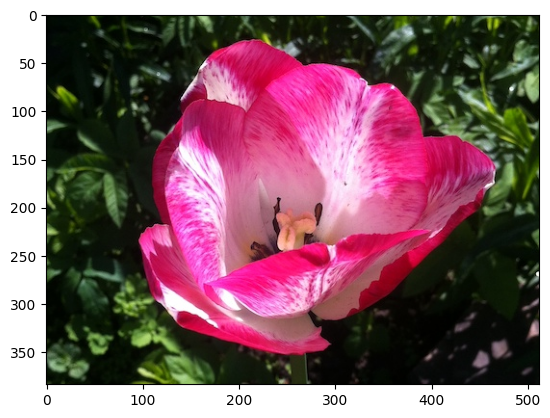

In [ ]:
img = pl.imread('12_001.jpg')
print(img.shape); pl.imshow(img);
img_index = pd.MultiIndex.from_product(
    (*map(range, img.shape[:2]), ('r', 'g', 'b')),
    names=('x', 'y', None))
img_df = pd.Series(img.flatten(), index=img_index)
img_df = img_df.unstack()
img_df = img_df.reset_index().reindex(columns=['x', 'y', 'r', 'g', 'b'])
img_df.head(15).T

In [ ]:
tables = pd.read_html('https://en.wikipedia.org/wiki/Minnesota')
tables[2]

,Location,July (°F),July (°C),January (°F),January (°C)
0,Minneapolis,83/64,28/18,23/7,−4/−13
1,Saint Paul,83/63,28/17,23/6,−5/−14
2,Rochester,82/63,28/17,23/3,−5/−16
3,Duluth,76/55,24/13,19/1,−7/−17
4,St. Cloud,81/58,27/14,18/−1,−7/−18
5,Mankato,86/62,30/16,23/3,−5/−16
6,International Falls,77/52,25/11,15/−6,−9/−21


In [ ]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True, parser='auto')
housing = housing['data']
type(housing)

pandas.core.frame.DataFrame

Quick access to statistics || Acceso rápido a estadísticas

In [ ]:
print(f'I: {len(tips)}\n'
      f'II: {tips.size}\n'
      f'III: {tips.shape}\n'
      f'IV: {tips.count().sum()}')
pd.DataFrame([tips.memory_usage(), tips.dtypes]).T

I: 244
II: 1708
III: (244, 7)
IV: 1708


,0,1
Index,128.0,NaN
total_bill,1952,float64
tip,1952,float64
sex,1952,object
smoker,1952,object
day,1952,object
time,1952,object
size,1952,int64


In [ ]:
display(weather.info())
display(weather.describe().T)
weather.flags, weather.attrs

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24376 entries, 0 to 24380
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               24376 non-null  datetime64[ns]
 1   Max_TemperatureC   24376 non-null  int64         
 2   Mean_TemperatureC  24376 non-null  int64         
 3   Min_TemperatureC   24376 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 952.2 KB


None

,count,mean,std,min,25%,50%,75%,max
Max_TemperatureC,24376.0,14.943756,7.172523,-18.0,9.0,14.0,20.0,54.0
Mean_TemperatureC,24376.0,11.043485,5.794158,-12.0,7.0,11.0,16.0,31.0
Min_TemperatureC,24376.0,7.251026,4.912932,-17.0,4.0,7.0,11.0,22.0


(<Flags(allows_duplicate_labels=True)>, {})

In [ ]:
saless.get('West').columns, saless.get('West').values

(Index(['Date', 'Customer', 'Sales'], dtype='object'),
 array([[Timestamp('2022-04-01 00:00:00'), 'A', 504],
        [Timestamp('2022-04-02 00:00:00'), 'B', 361],
        [Timestamp('2022-04-03 00:00:00'), 'A', 694],
        [Timestamp('2022-04-04 00:00:00'), 'B', 702],
        [Timestamp('2022-04-05 00:00:00'), 'A', 255],
        [Timestamp('2022-04-06 00:00:00'), 'C', 550],
        [Timestamp('2022-04-07 00:00:00'), 'A', 435],
        [Timestamp('2022-04-08 00:00:00'), 'B', 724],
        [Timestamp('2022-04-09 00:00:00'), 'A', 407],
        [Timestamp('2022-04-10 00:00:00'), 'B', 753]], dtype=object))

In [ ]:
# select a specific data type / seleccione un tipo de datos específico
d = {'a':[1, 2], 'b':[True, False], 'c':[1.5, 2.3], 'd':['a', 'b']}
pd.DataFrame(d).select_dtypes('int')

,a
0,1
1,2


In [ ]:
# unique values / valores únicos
df = pd.DataFrame([1, 2, np.nan, 8, 2, 3, np.nan, 1], columns=['col'])
display(df['col'].value_counts() == 1)
print(f"{df['col'].nunique() = }; {df['col'].nunique(dropna=False) = }")
display(df['col'].unique())
# allowed unique elements / elementos únicos permitidos
pd.unique(pd.Series(pd.Categorical(
    list("ddbaabeecffcd"), categories=list("abcd"), ordered=True)))

1.0    False
2.0    False
8.0     True
3.0     True
Name: col, dtype: bool

df['col'].nunique() = 4; df['col'].nunique(dropna=False) = 5


array([ 1.,  2., nan,  8.,  3.])

['d', 'b', 'a', NaN, 'c']
Categories (4, object): ['a' < 'b' < 'c' < 'd']

In [ ]:
# indexes of maximum / minimum values in each column
# índices de valores máximos / mínimos en cada columna
df = pd.DataFrame(
    {'consumption': [10.51, 103.11, 55.48],
     'co2_emissions': [37.2, 19.66, 1712]},
     index=['Pork', 'Wheat Products', 'Beef'])
df.idxmax()

consumption      Wheat Products
co2_emissions              Beef
dtype: object

In [ ]:
# indexes of maximum/minimum values in each line
# índices de valores máximos/mínimos en cada línea
m, n = 5, 4
start_end = pd.DataFrame(
    np.random.randn(m, n),
    index=pd.date_range('9/19/2022', periods=m),
    columns=[f'col{i+1}' for i in range(n)])
display(start_end.idxmax(axis="columns"))
# sort by smallest/largest values in a column
# ordenar por valores más pequeños/más grandes en una columna
start_end.nsmallest(3,'col1'), start_end.nlargest(3,'col2')

2022-09-19    col1
2022-09-20    col1
2022-09-21    col3
2022-09-22    col4
2022-09-23    col1
Freq: D, dtype: object

(                col1      col2      col3      col4
 2022-09-22  0.272733 -1.105823  0.149155  0.391304
 2022-09-21  0.345087  0.038155  2.426921 -0.122923
 2022-09-20  0.880523 -0.298551  0.308177 -1.281664,
                 col1      col2      col3      col4
 2022-09-19  1.989065  0.232015 -0.707696 -0.049099
 2022-09-21  0.345087  0.038155  2.426921 -0.122923
 2022-09-20  0.880523 -0.298551  0.308177 -1.281664)

In [ ]:
start_end.name = 'online courses'
start_end.index.name = 'start-end dates'
print(start_end.name)
display(start_end)

online courses


,col1,col2,col3,col4
start-end dates,,,,
2022-09-19,1.989065,0.232015,-0.707696,-0.049099
2022-09-20,0.880523,-0.298551,0.308177,-1.281664
2022-09-21,0.345087,0.038155,2.426921,-0.122923
2022-09-22,0.272733,-1.105823,0.149155,0.391304
2022-09-23,1.178995,-1.731918,0.639239,0.232949


Basic manipulations || Manipulaciones básicas

In [ ]:
# switch to another data format / cambiar a otro formato de datos
schess2.to_frame(), schess2.to_numpy()

(          0
 ♔ -1.168386
 ♕ -0.280260
 ♖ -0.529190
 ♗  1.104318
 ♘  1.302838
 ♙ -1.776910,
 array([-1.1683857 , -0.28026008, -0.5291895 ,  1.10431764,  1.30283802,
        -1.77690958]))

In [ ]:
df = pd.DataFrame(
    [['Laptop', 'Printer', 'Monitor', 'Tablet'],
     [1200, 100, 300, 150]],
    index=['Product', 'Price']).T
df, df.to_dict(), df.to_dict(orient='list'), df.to_dict(orient='split')

(   Product Price
 0   Laptop  1200
 1  Printer   100
 2  Monitor   300
 3   Tablet   150,
 {'Product': {0: 'Laptop', 1: 'Printer', 2: 'Monitor', 3: 'Tablet'},
  'Price': {0: 1200, 1: 100, 2: 300, 3: 150}},
 {'Product': ['Laptop', 'Printer', 'Monitor', 'Tablet'],
  'Price': [1200, 100, 300, 150]},
 {'index': [0, 1, 2, 3],
  'columns': ['Product', 'Price'],
  'data': [['Laptop', 1200],
   ['Printer', 100],
   ['Monitor', 300],
   ['Tablet', 150]]})

In [ ]:
# expand data / ampliar datos
df = pd.DataFrame(['A B C D E', '10 20 30 40 50'],
                  index=['type', 'value'])
df, df[0].str.split(" ", expand=True)

(                    0
 type        A B C D E
 value  10 20 30 40 50,
         0   1   2   3   4
 type    A   B   C   D   E
 value  10  20  30  40  50)

In [ ]:
s = pd.Series([10, 20, 60], index=[1, 2, 6])
s.reindex(index=list(range(10)), method='ffill')

0     NaN
1    10.0
2    20.0
3    20.0
4    20.0
5    20.0
6    60.0
7    60.0
8    60.0
9    60.0
dtype: float64

In [ ]:
# select, sort, rank / seleccionar, ordenar, clasificar
df_rank = pd.DataFrame([15, 72, 45, 83, 22, 36], columns=['price'])
df_rank["rank"] = df_rank["price"].rank(
    method="first", ascending=False).astype("int")
(df_rank.sort_values(by="price", ascending=False),
 saless.get('West')[saless.get('West').Customer.str.startswith("B")],
 schess2[schess2 < schess2.median()])

(   price  rank
 3     83     1
 1     72     2
 2     45     3
 5     36     4
 4     22     5
 0     15     6,
         Date Customer  Sales
 1 2022-04-02        B    361
 3 2022-04-04        B    702
 7 2022-04-08        B    724
 9 2022-04-10        B    753,
 ♔   -1.168386
 ♖   -0.529190
 ♙   -1.776910
 dtype: float64)

In [ ]:
df1 = pd.DataFrame({'x':[1, 3, 2, 8], 'y':[2, 4, 1, 5], 'z':[3, 4, 5, 7]})
display(df1)
# delete rows / eliminar filas
df1.drop(1, axis=0, inplace=True)
display(df1)
# delete columns / eliminar columnas
del df1['x']
# the same / lo mismo
# df1.drop('x', axis=1, inplace=True)
display(df1)

,x,y,z
0,1,2,3
1,3,4,4
2,2,1,5
3,8,5,7


,x,y,z
0,1,2,3
2,2,1,5
3,8,5,7


,y,z
0,2,3
2,1,5
3,5,7


In [ ]:
# swap columns / intercambiar columnas
df1.loc[:,['y','z']] = df1[['z','y']].to_numpy()
display(df1)
# the first line and the last one / la primera línea y la última
display(df1[:1], df1[-1:])

,y,z
0,3,2
2,5,1
3,7,5


,y,z
0,3,2


,y,z
3,7,5


In [ ]:
df2 = df1.rename(columns={'z':'x'})
display(df1, df2)
df2['y'] = [8, 12, np.nan]
df2.rename(columns={'x':'xx'}, inplace=True)
display(df1, df2)

,y,z
0,3,2
2,5,1
3,7,5


,y,x
0,3,2
2,5,1
3,7,5


,y,z
0,3,2
2,5,1
3,7,5


,y,xx
0,8.0,2
2,12.0,1
3,NaN,5


In [ ]:
# element value | replacement / valor de elemento | reemplazo
start_end.at['2022-09-23', 'col3'] = .999999 # by item / por artículo
start_end.iat[1, 0] = pd.Timestamp('20220101') # by numbers / por números
# start_end.at['2022-09-23', 'col3'] # does not work / no funciona
start_end.at[pd.Timestamp('20220923'), 'col3']

0.999999

In [ ]:
# reindex (changes the order of indices, but not values)
# reindexar (cambia el orden de los índices, pero no de los valores)
start_end = start_end.reindex(index=start_end.index[::-1])
start_end

,col1,col2,col3,col4
start-end dates,,,,
2022-09-23,1.178995,-1.731918,0.999999,0.232949
2022-09-22,0.272733,-1.105823,0.149155,0.391304
2022-09-21,0.345087,0.038155,2.426921,-0.122923
2022-09-20,2022-01-01 00:00:00,-0.298551,0.308177,-1.281664
2022-09-19,1.989065,0.232015,-0.707696,-0.049099


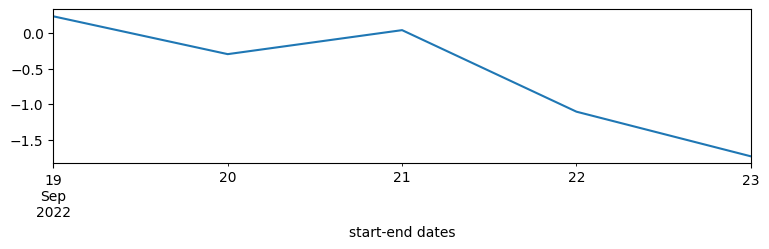

In [ ]:
# access as attributes / acceso como atributos
# it does not work if there is no the column / no funciona si no existe la columna
# start_end.col5 = list(range(5))
start_end['col5'] = list(range(5))
start_end.col2.plot(figsize=(9, 2));

In [ ]:
numeric_features = housing.columns[[3, 4, 17, 18]]
stats = housing.describe().transpose()
dfn = housing.copy()
for nc in numeric_features:
    mean = stats.loc[nc, 'mean']; std = stats.loc[nc,'std']
    dfn.loc[:,nc] = (dfn.loc[:,nc] - mean) / std
dfn[numeric_features].tail(5).style.bar(
    align='mid', color=['#7676ff', '#ff7676'], subset=numeric_features)

,LotFrontage,LotArea,OverallQual,OverallCond
1455,-0.331482,-0.260471,-0.071812,-0.517023
1456,0.615614,0.266316,-0.071812,0.381612
1457,-0.166770,-0.147760,0.651256,3.077516
1458,-0.084413,-0.080133,-0.794879,0.381612
1459,0.203833,-0.058092,-0.794879,0.381612


Boolean Operators || Operadores booleanos

In [ ]:
df1 = pd.DataFrame({'x':[1, 3, 2], 'y':[2, 4, 1], 'z':[1, 0, 1]})
df2 = pd.DataFrame({'x':[3, 1, 2], 'y':[5, 2, 2], 'z':[2, 1, 1]})
display(df1 <= df2)
(df1 <= df2).any(axis=1), (df1 <= df2).all(axis=1)

,x,y,z
0,True,True,True
1,False,False,True
2,True,True,True


(0    True
 1    True
 2    True
 dtype: bool,
 0     True
 1    False
 2     True
 dtype: bool)

In [ ]:
display(df1[(df1['x'] != 3) & (df1['y'] >= 2)])
display(df1[df1['x'].ne(3).__and__(df1['y'].ge(2))])
display(df1[(df1['x'] == 3) | (df1['y'] < 2)])
display(df1[df1['x'].eq(3).__or__(df1['y'].lt(2))])

,x,y,z
0,1,2,1


,x,y,z
0,1,2,1


,x,y,z
1,3,4,0
2,2,1,1


,x,y,z
1,3,4,0
2,2,1,1


Samples and slices
- [ ] random selection
  - [x] sample()
- [ ] data frame slice
  - [x] select elements from the start to the end  in increments of the value
- [ ] select rows by condition
  - [x] comparative methods
  - [x] query()
- [ ] data grouping
  - [x] pivot_table()
  - [x] groupby()
- [ ] joining tables
  - [x] merge()
  - [x] concat()
  
Muestras y rebanadas
- [ ] Selección aleatoria
   - [x] sample()
- [ ] segmento de marco de datos
   - [x] selecciona elementos desde el principio hasta el final en incrementos del valor
- [ ] seleccionar filas por condición
   - [x] métodos comparativos
   - [x] query()
- [ ] agrupación de datos
   - [x] pivot_table()
   - [x] groupby()
- [ ] unir mesas
   - [x] merge()
   - [x] concat()

In [ ]:
# sampling with rotation (transposition) / muestreo con rotación (transposición)
weather.sample(7).transpose()

,15805,5298,11764,17156,350,1921,9653
Date,1991-04-10 00:00:00,1962-07-04 00:00:00,1980-03-17 00:00:00,1994-12-21 00:00:00,1948-12-16 00:00:00,1953-04-05 00:00:00,1974-06-06 00:00:00
Max_TemperatureC,11,16,11,11,6,10,16
Mean_TemperatureC,6,13,7,9,3,6,13
Min_TemperatureC,1,11,3,6,-1,2,11


In [ ]:
# [start:finish-1:step]
weather.iloc[1:9:2]

,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC
1,1948-01-02,6,4,3
3,1948-01-04,7,4,2
5,1948-01-06,9,7,5
7,1948-01-08,8,5,2


In [ ]:
(start_end[start_end['col2'].gt(start_end['col3'])],
 start_end.query('col2 > col3'))

(                     col1      col2      col3      col4  col5
 start-end dates                                              
 2022-09-19       1.989065  0.232015 -0.707696 -0.049099     4,
                      col1      col2      col3      col4  col5
 start-end dates                                              
 2022-09-19       1.989065  0.232015 -0.707696 -0.049099     4)

In [ ]:
url = 'https://raw.githubusercontent.com/'+\
      'OlgaBelitskaya/machine_learning_engineer_nd009/'+\
      'master/Machine_Learning_Engineer_ND_P3/customers.csv'
customers = pd.read_csv(url).dropna()
# average values when grouped by the Channel field
# valores promedio cuando se agrupan por el campo Canal
display(pd.pivot_table(
    customers, index='Channel', aggfunc='mean', values=['Fresh', 'Milk']))
ch = customers.groupby('Channel')
display(ch[['Fresh', 'Milk']].mean())
display(ch.groups.keys(), ch.nth(0), ch.size())

,Fresh,Milk
Channel,,
1,13475.560403,3451.724832
2,8904.323944,10716.500000


,Fresh,Milk
Channel,,
1,13475.560403,3451.724832
2,8904.323944,10716.500000


dict_keys([1, 2])

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
1,3,13265,1196,4221,6404,507,1788
2,3,12669,9656,7561,214,2674,1338


Channel
1    298
2    142
dtype: int64

In [ ]:
# sample scaling | escalado de muestra
ch.transform(lambda x: (x - x.mean()) / x.std())[['Fresh', 'Milk']].head()

,Fresh,Milk
0,0.418869,-0.109560
1,-0.205539,-0.093650
2,-0.283868,-0.197167
3,-0.015223,-0.518299
4,1.525491,-0.548213


In [ ]:
# aggregation / agregación
ch.agg([('diff', lambda x: x.max() - x.min()), ('mean', 'mean')]).T[2:]

Channel                            1             2
Fresh            diff  112148.000000  44448.000000
                 mean   13475.560403   8904.323944
Milk             diff   43895.000000  72570.000000
                 mean    3451.724832  10716.500000
Grocery          diff   21039.000000  90037.000000
                 mean    3962.137584  16322.852113
Frozen           diff   60844.000000  11526.000000
                 mean    3748.251678   1652.612676
Detergents_Paper diff    6904.000000  40495.000000
                 mean     790.560403   7269.507042
Delicatessen     diff   47940.000000  16520.000000
                 mean    1415.956376   1753.436620

Data conversion methods
- applying a matching dictionary
- attaching a new field with Series
- custom, built-in, and anonymous functions

Métodos de conversión de datos
- aplicar un diccionario coincidente
- adjuntar un nuevo campo con Serie
- funciones personalizadas, integradas y anónimas

In [ ]:
df1 = pd.DataFrame({
    'name': ['Tomas', 'Sophia', 'Mary', 'Daniel',
             'Olivia', 'James', 'Barbara'],
    'age': [30, 41, 32, 67, 44, 52, 47],
    'rank': ['90%', '95%', '100%', '82%', '87%', '86%', '93%'],
    'age_': [30, 41, None, 67, None, 52, 47],
    'income': [10000, 8000, 5500, 6200, 12000, 7300, 11500]
})
gender = {'Tomas':'M', 'Sophia':'F', 'Mary':"F", 'Daniel':"M",
          'Olivia':"F", 'James':"M", 'Barbara':"F"}
df1['gender'] = df1['name'].map(gender)
surnames = pd.Series(
    ['Murray', 'Evans', 'Taylor', 'Gilbert',
     'Williams', 'Paterson', 'Harrison'], index=df1['name'])
df1['surname'] = df1['name'].map(surnames)
mean_income = df1['income'].mean()
def higher_income(x):
    return x > mean_income
df1['higher_income'] = df1['income'].map(higher_income)
# df1['higher_income'] = df1['income'].map(lambda x: x > mean_income)
# df1['higher_income'] = df1['income'] > mean_income
def interview(row):
    return row['age'] < 50 and row['income'] > 7500
df1['interview'] = df1.apply(interview, axis=1)
def bonus(row, amount, give=False):
    if give: return row['income'] / row['age'] * amount
    else: return 0
df1['bonus'] = df1.apply(bonus, args=(6.5,), give=True, axis=1)
df1 = df1.assign(year_bonus=df1['bonus']*4)
df1.T

,0,1,2,3,4,5,6
name,Tomas,Sophia,Mary,Daniel,Olivia,James,Barbara
age,30,41,32,67,44,52,47
rank,90%,95%,100%,82%,87%,86%,93%
age_,30.0,41.0,NaN,67.0,NaN,52.0,47.0
income,10000,8000,5500,6200,12000,7300,11500
gender,M,F,F,M,F,M,F
surname,Murray,Evans,Taylor,Gilbert,Williams,Paterson,Harrison
higher_income,True,False,False,False,True,False,True
interview,True,True,False,False,True,False,True
bonus,2166.666667,1268.292683,1117.1875,601.492537,1772.727273,912.5,1590.425532


In [ ]:
df2 = pd.DataFrame(
    [[1, 2.12, 3.2674, 4.1, 2.89076],
     [3.356, 4.567, 2.1, 1.8, np.nan],
     [58, 0, 119, 3399, 398209]],
     columns=[f'col{i+1}' for i in range(5)])
df2t = df2.applymap(lambda x: len(str(x)), na_action='ignore')
display(df2t)
from sklearn.preprocessing import MinMaxScaler
df2t.iloc[:, :] = MinMaxScaler().fit_transform(df2t.to_numpy())
display(df2t)

,col1,col2,col3,col4,col5
0,3,4,6,3,7.0
1,5,5,3,3,NaN
2,4,3,5,6,8.0


<ipython-input-127-70b978b7f810>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2t.iloc[:, :] = MinMaxScaler().fit_transform(df2t.to_numpy())


,col1,col2,col3,col4,col5
0,0.0,0.5,1.000000,0.0,0.0
1,1.0,1.0,0.000000,0.0,NaN
2,0.5,0.0,0.666667,1.0,1.0


In [ ]:
# additional information / información adicional
df3 = pd.DataFrame({'time': ['23-02-12 10:12', '23-02-13 10:45']})
df3['time'] = pd.to_datetime(df3['time'], format='%y-%m-%d %H:%M')
df3['rounded'] = df3['time'].dt.round('1H')
df3['ceil'] = df3['time'].dt.ceil('1H')
df3['floor'] = df3['time'].dt.floor('1H')
df3['moscow_time'] = df3['time'] + pd.Timedelta(hours=3)
df3['weekday'] = df3['time'].dt.weekday
df3

,time,rounded,ceil,floor,moscow_time,weekday
0,2023-02-12 10:12:00,2023-02-12 10:00:00,2023-02-12 11:00:00,2023-02-12 10:00:00,2023-02-12 13:12:00,6
1,2023-02-13 10:45:00,2023-02-13 11:00:00,2023-02-13 11:00:00,2023-02-13 10:00:00,2023-02-13 13:45:00,0


In [ ]:
# visual effects / efectos visuales
def apply_styler(f):
    def inf(df): return df.style.apply(f)
    return inf
@apply_styler
def pos_neg(x, bc="whitesmoke", posc="#EE2E31", negc="#31D843"):
    style_pos = f"background-color:{bc}; color:{posc}; font-weight:bold;"
    style_neg = f"background-color:{bc}; color:{negc}; font-weight:bold;"
    return [style_pos if i else style_neg for i in x >= 0]
df_mn = lambda m, n: pd.DataFrame(
    np.random.randn(m, n),
    index=[f'id{i+1}' for i in range(m)],
    columns=[f'col{i+1}' for i in range(n)])
pos_neg(df_mn(3, 7))

,col1,col2,col3,col4,col5,col6,col7
id1,-0.917417,0.715146,-0.336066,0.662995,1.118071,-0.382674,-0.627593
id2,-1.555149,0.699156,0.284409,-0.137070,-0.604160,-1.034902,1.126372
id3,0.496684,-1.801779,-0.847417,0.239985,2.257237,0.594551,0.848513


In [ ]:
# concatenation / concatenación
def dgen(m,n):
    return (
        pd.DataFrame(
            {l:[f"{l}_{j+1}_{i}" for i in range(j * m, (j + 1) * m)]
             for l in list('ABCDE')}, index=range(j * m, (j + 1) * m))
        for j in range(n))
display(*tuple(dgen(2, 3)))
pd.concat(
    list(dgen(2, 3)), keys=[f"id{i+1}" for i in range(3)])

,A,B,C,D,E
0,A_1_0,B_1_0,C_1_0,D_1_0,E_1_0
1,A_1_1,B_1_1,C_1_1,D_1_1,E_1_1


,A,B,C,D,E
2,A_2_2,B_2_2,C_2_2,D_2_2,E_2_2
3,A_2_3,B_2_3,C_2_3,D_2_3,E_2_3


,A,B,C,D,E
4,A_3_4,B_3_4,C_3_4,D_3_4,E_3_4
5,A_3_5,B_3_5,C_3_5,D_3_5,E_3_5


A      B      C      D      E
id1 0  A_1_0  B_1_0  C_1_0  D_1_0  E_1_0
    1  A_1_1  B_1_1  C_1_1  D_1_1  E_1_1
id2 2  A_2_2  B_2_2  C_2_2  D_2_2  E_2_2
    3  A_2_3  B_2_3  C_2_3  D_2_3  E_2_3
id3 4  A_3_4  B_3_4  C_3_4  D_3_4  E_3_4
    5  A_3_5  B_3_5  C_3_5  D_3_5  E_3_5

|`Merge`|`SQL Join`|Description|
|--|--|--|
|`left`|`LEFT OUTER JOIN`|key fields (keys) only from the table on the left|
|`right`|`RIGHT OUTER JOIN`|key fields (keys) only from the table on the right|
|`outer`|`FULL OUTER JOIN`| union of keys from both tables|
|`inner`|`INNER JOIN`|intersection of keys from both tables|
|`cross`|`CROSS JOIN`|direct product (Cartesian product) of rows from both tables|

In [ ]:
# by default how='inner' / por defecto
df_left = pd.DataFrame({"🔑1":["🐕","🐕","🐈","🐎"],
                        "🔑2":["🐕","🐈","🐕","🐈"],
                        "🌹":["🌹0","🌹1","🌹2","🌹3"],
                        "🌻":["🌻0","🌻1","🌻2","🌻3"]})
df_right = pd.DataFrame({"🔑1":["🐕","🐈","🐈","🐎"],
                         "🔑2":["🐕","🐕","🐕","🐕"],
                         "🐝":["🐝0","🐝1","🐝2","🐝3"],
                         "🐞":["🐞0","🐞1","🐞2","🐞3"]})
display(df_left, df_right, pd.merge(df_left, df_right, on=["🔑1", "🔑2"]))

,🔑1,🔑2,🌹,🌻
0,🐕,🐕,🌹0,🌻0
1,🐕,🐈,🌹1,🌻1
2,🐈,🐕,🌹2,🌻2
3,🐎,🐈,🌹3,🌻3


,🔑1,🔑2,🐝,🐞
0,🐕,🐕,🐝0,🐞0
1,🐈,🐕,🐝1,🐞1
2,🐈,🐕,🐝2,🐞2
3,🐎,🐕,🐝3,🐞3


,🔑1,🔑2,🌹,🌻,🐝,🐞
0,🐕,🐕,🌹0,🌻0,🐝0,🐞0
1,🐈,🐕,🌹2,🌻2,🐝1,🐞1
2,🐈,🐕,🌹2,🌻2,🐝2,🐞2


In [ ]:
df4 = pd.DataFrame(
    {'key':['A','B','C','D','E'], 'value':list(range(5))})
df5 = pd.DataFrame(
    {'key':['B','D','E','F','G'], 'value':list(range(5,10))})
df6 = df4.merge(df5, on='key')
display(df6, df6.groupby(df6.dtypes, axis=1).groups,
        df5.groupby(df5.dtypes, axis=1).groups)
s2 = pd.Series(["S", 5., 8.], index=["key", "value_x", "value_y"])
df7 = pd.concat([df6, s2.to_frame().T], ignore_index=True)
display(df7, df7.groupby(df7.dtypes, axis=1).groups)

,key,value_x,value_y
0,B,1,5
1,D,3,6
2,E,4,7


{int64: ['value_x', 'value_y'], object: ['key']}

{int64: ['value'], object: ['key']}

,key,value_x,value_y
0,B,1,5
1,D,3,6
2,E,4,7
3,S,5.0,8.0


{object: ['key', 'value_x', 'value_y']}

Extracting fragments || Extrayendo fragmentos

In [ ]:
outliers = [65, 66, 75, 128, 154]
for t in customers.iloc[outliers].itertuples():
    s = f'{t}'.find('Frozen')
    print(f'{t}'[:s], f'{t}'[s:], sep='\n\t')

Pandas(Index=65, Channel=2, Region=3, Fresh=85, Milk=20959, Grocery=45828, 
	Frozen=36, Detergents_Paper=24231, Delicatessen=1423)
Pandas(Index=66, Channel=1, Region=3, Fresh=9, Milk=1534, Grocery=7417, 
	Frozen=175, Detergents_Paper=3468, Delicatessen=27)
Pandas(Index=75, Channel=1, Region=3, Fresh=20398, Milk=1137, Grocery=3, 
	Frozen=4407, Detergents_Paper=3, Delicatessen=975)
Pandas(Index=128, Channel=1, Region=3, Fresh=140, Milk=8847, Grocery=3823, 
	Frozen=142, Detergents_Paper=1062, Delicatessen=3)
Pandas(Index=154, Channel=1, Region=3, Fresh=622, Milk=55, Grocery=137, 
	Frozen=75, Detergents_Paper=7, Delicatessen=8)


In [ ]:
df8 = df_mn(10, 8)
df8.loc[df8.sample(frac=.3).index,'col5'] = np.nan
df8.query('col1 > col3')

,col1,col2,col3,col4,col5,col6,col7,col8
id1,1.602688,1.936305,0.222710,-0.611126,1.352659,-0.771802,-0.143654,-0.744391
id2,0.869355,-1.216882,-0.111885,-1.726621,NaN,2.848348,2.298268,-0.796258
id5,0.974921,0.611211,-0.721655,-0.383850,NaN,-0.539651,0.084028,-0.009827
id7,-0.491049,-0.653489,-0.866339,-0.216528,0.242555,-0.432875,-1.268201,-0.806479


In [ ]:
# with a global variable and methods / con una variable global y métodos
n = 0
df8.query('col5 < @n | col5.isnull()', engine='python')

,col1,col2,col3,col4,col5,col6,col7,col8
id2,0.869355,-1.216882,-0.111885,-1.726621,NaN,2.848348,2.298268,-0.796258
id5,0.974921,0.611211,-0.721655,-0.383850,NaN,-0.539651,0.084028,-0.009827
id9,0.714316,1.010333,1.552368,1.855001,NaN,-0.690066,0.748066,-0.768424


In [ ]:
# intersection of information sources / intersección de fuentes de información
d1 = {1:1, 2:22, 3:33}
d2 = {'a':range(5), 'b':range(15,5,-2), 'c':['|','&','&','&','|']}
ds1 = pd.Series(d1)
df2 = pd.DataFrame(d2)
# matches the keys of the dictionary d1, / coincide con las claves del diccionario d1,
# the indexes of the ds1 series, / los índices de la serie ds1
# and the values in the ds1 series / y los valores de la serie ds1
display(df2.query('a in @d1'),
        df2.query('a in @ds1.index'),
        df2.query('a in @ds1'))

,a,b,c
1,1,13,&
2,2,11,&
3,3,9,&


,a,b,c
1,1,13,&
2,2,11,&
3,3,9,&


,a,b,c
1,1,13,&


In [ ]:
d3 = {'a':range(2,7), 'b':range(15,5,-2), 'c':['|','&','&','&','|']}
d4 = {1:range(5,0,-1), 2:range(7,16,2), 3:list('abcde')}
df3, df4 = pd.DataFrame(d3), pd.DataFrame(d4)
# values in df3.a present in df4.index
# valores en df3.a presentes en df4.index
display(df3.query('a in @df4.index'))

,a,b,c
0,2,15,|
1,3,13,&
2,4,11,&
